### Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [64]:
df = pd.read_csv('loan_data.csv')
df.head()  # diplaying top 5 rows of the dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Basic Shape & Info

In [65]:
print(df.shape)  # get the idea about total number of rows and columns

df.info()

(9578, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Target Variable Check

In [66]:
# This show class imbalance among target feature
print(df['not.fully.paid'].value_counts())

df['not.fully.paid'].value_counts(normalize=True)  # To interpret results in percentage terms

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64

### Missing Values

In [67]:
df.isnull().sum()  # no missing values in the dataset 

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Data Types Review

In [68]:
df.dtypes  # helps to identify numerical and categorical columns

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Numerical Feature Summary

In [69]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### IQR-Based Outlier Detection

In [70]:
nums_cols = df.drop('not.fully.paid', axis=1)\
             .select_dtypes(include=np.number)\
             .columns  # consider only numerical columns

Q1 = df[nums_cols].quantile(0.25)
Q3 = df[nums_cols].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[nums_cols] < ( Q1 - IQR * 1.5)) |(df[nums_cols] < ( Q3 + IQR * 1.5)) )

outliers.sum()  # .sum() will give columns-wise outliers count

credit.policy        1868
int.rate             9527
installment          9342
log.annual.inc       9457
dti                  9578
fico                 9572
days.with.cr.line    9232
revol.bal            8798
revol.util           9578
inq.last.6mths       8822
delinq.2yrs             0
pub.rec                 0
dtype: int64

### Visual Check ( BOXPLOT )

- Outliers represent genuine high-risk borrowers; removing them would reduce model’s ability to learn extreme risk patterns.


    **Feature Meaning**

- fico → Creditworthiness score

- int.rate → Risk-based pricing

- dti → Debt burden

- revol.util → Credit utilization

- inq.last.6mths → Recent credit hunger

- purpose → Text signal (Track B)

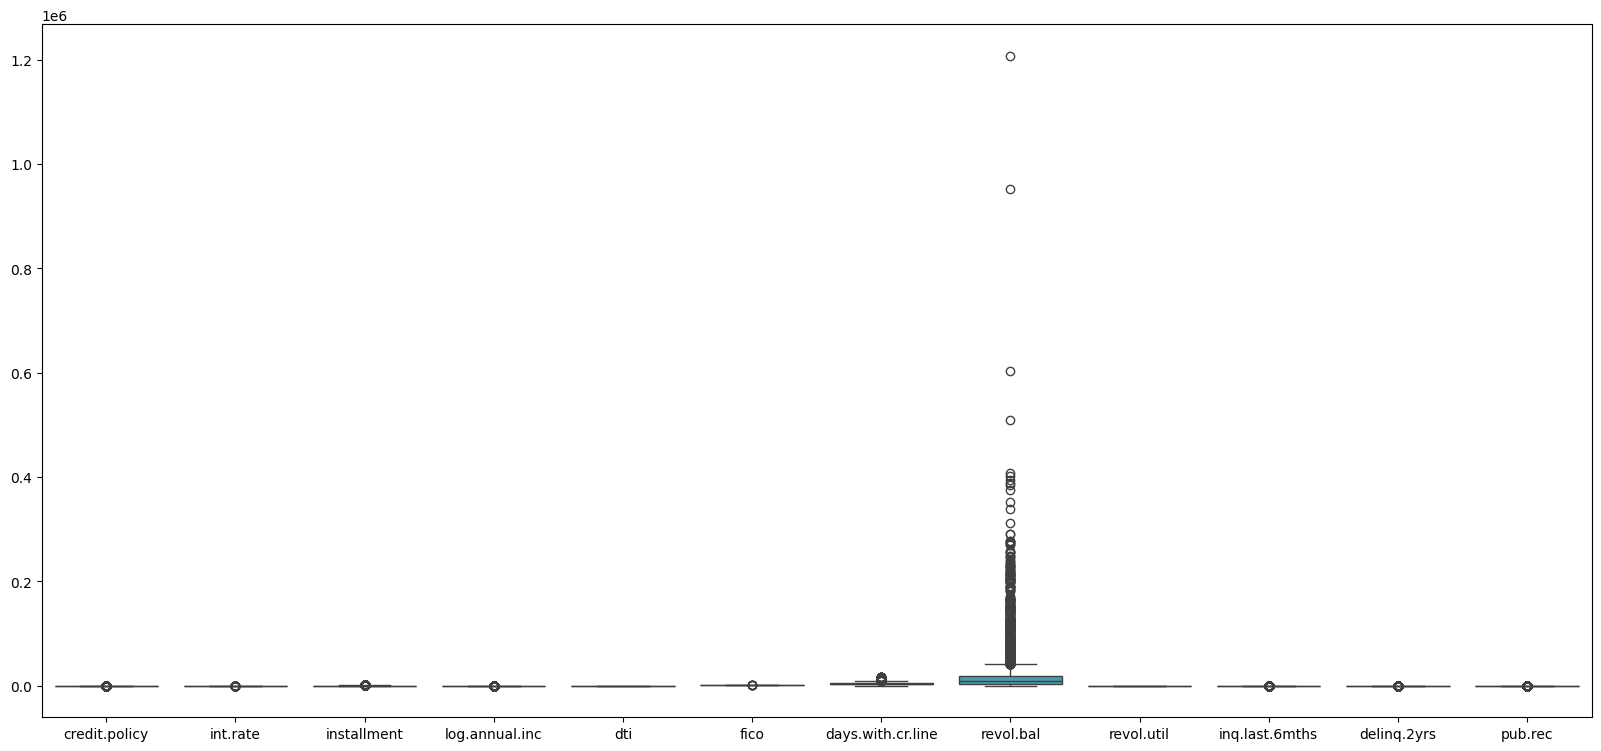

In [71]:
plt.figure(figsize=(20,9))
sns.boxplot(df[nums_cols])
plt.show()

### Correlation Matrix

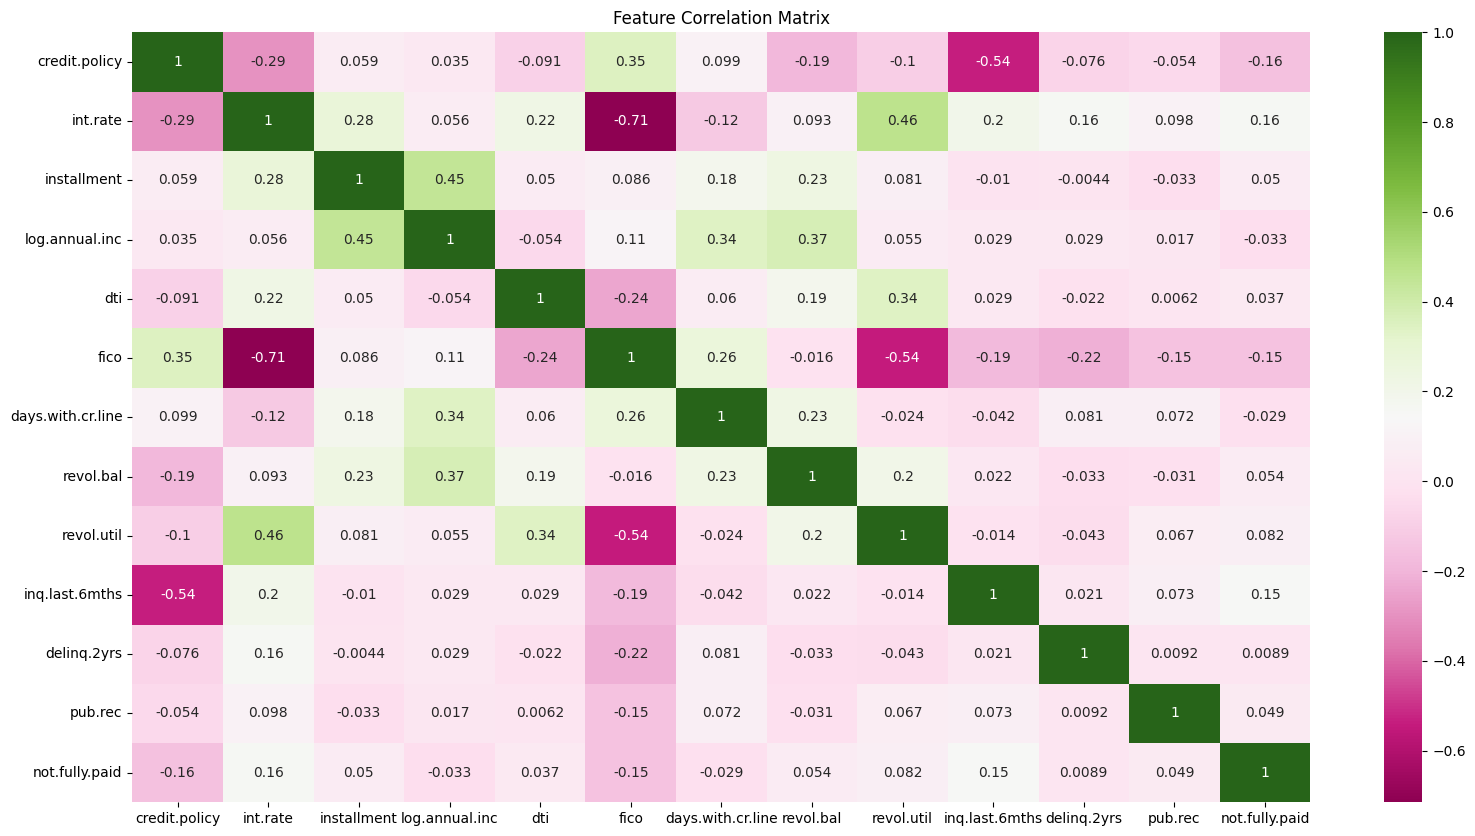

In [72]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="PiYG")  # "PiYG" (pink → white → green) 
plt.title("Feature Correlation Matrix")
plt.show()

### Correlation With Target

In [73]:
# We have to observe strong positive risk drivers and weak redudant features as well

df.corr(numeric_only=True)['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

### Handle Outliers ( Winsorization )

In [74]:
for col in nums_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df[col] = np.clip(df[col],lower,upper)

### Feature Interaction

In [75]:
# High value → strong affordability → lower default risk
# Low value → financial stress → higher default risk
df['income_to_installement'] = np.exp(df['log.annual.inc']) / df['installment']


# revol.util → % of credit limit already used
# dti → debt-to-income ratio
df['credit_utilization_risk'] = df['revol.util'] * df['dti']

### Feature / Target Split

In [76]:
X = df.drop("not.fully.paid",axis=1)
y = df['not.fully.paid']

print(X.head(),end='\n\n')
print(y.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti   fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48  737.0        5639.958333    28854.0        52.1               0   
1  14.29  707.0        2760.000000    33623.0        76.7               0   
2  11.63  682.0        4710.000000     3511.0        25.6               1   
3   8.10  712.0        2699.958333    33667.0        73.2               1   
4  14.97  667.0        4066.000000     4740.0        39.5               0   

   delinq.2yrs  pub.rec  income_to_installement  credit_utiliz

### Text Column Check

In [77]:
df['purpose'].value_counts() # understanding different categories

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

### Basic Text Cleaning

- Converts text -> numeric risk signals

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=20
)

purpose_tfidf = tfidf.fit_transform(df['purpose'])

print(purpose_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9578 stored elements and shape (9578, 7)>
  Coords	Values
  (0, 2)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 2)	1.0
  (7, 0)	1.0
  (8, 4)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 6)	1.0
  (14, 2)	1.0
  (15, 5)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 2)	1.0
  (19, 5)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 2)	1.0
  :	:
  (9553, 2)	1.0
  (9554, 6)	1.0
  (9555, 4)	1.0
  (9556, 2)	1.0
  (9557, 1)	1.0
  (9558, 2)	1.0
  (9559, 1)	1.0
  (9560, 0)	1.0
  (9561, 0)	1.0
  (9562, 2)	1.0
  (9563, 2)	1.0
  (9564, 0)	1.0
  (9565, 0)	1.0
  (9566, 0)	1.0
  (9567, 0)	1.0
  (9568, 0)	1.0
  (9569, 4)	1.0
  (9570, 0)	1.0
  (9571, 0)	1.0
  (9572, 2)	1.0
  (9573, 0)	1.0
  (9574, 0)	1.0
  (9575, 2)	1.0
  (9576, 4)	1.0
  (9577, 2)	1.0


### TF-IDF Feature Names

In [79]:
tfdif_features = pd.DataFrame(
    purpose_tfidf.toarray(),
    columns = tfidf.get_feature_names_out()
)

tfdif_features.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Merge Text + Structured Features

- Text-based purpose features capture borrower intent and loan motivation, which structured financial variables cannot express.

In [80]:
X_structured = X.drop('purpose',axis=1).reset_index(drop=True)
X_final = pd.concat([X_structured,tfdif_features],axis=1)

### Splitting the Data

- Using 25% of the data for testing and rest 75% of data for training the model and setting the random_state = 42 for model reproducibility and mainitaining class imbalance ratio 

In [81]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.20,stratify=y,random_state=42
)

## Baseline Model - Logisitic Regression

### Train Baseline Model

In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\YASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Baseline Model Evaluation

- **Logistic Regression serves as a transparent baseline to benchmark complex models.**

- ROC-AUC measures how well the model distinguishes risky borrowers from safe ones across all decision thresholds.

In [83]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.67      0.01      0.01       307

    accuracy                           0.84      1916
   macro avg       0.75      0.50      0.46      1916
weighted avg       0.81      0.84      0.77      1916

ROC-AUC: 0.6582901958243836


## Tree Based Model - Random Forest

### Train Tree-Based Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rfc.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

### Tree-Based Model Evaluation

In [85]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.67      0.01      0.01       307

    accuracy                           0.84      1916
   macro avg       0.75      0.50      0.46      1916
weighted avg       0.81      0.84      0.77      1916

ROC-AUC: 0.6582901958243836


### Feature Importance

- **Tree-based models capture non-linear interactions and outperform linear baselines on complex risk patterns.**

- Shows which financial + text features drive risk
- Strong point for explainability

In [86]:
importances = pd.Series(
    rfc.feature_importances_,
    index = X_final.columns
).sort_values(ascending=False)

importances.head()

int.rate                  0.137062
fico                      0.097394
income_to_installement    0.091426
inq.last.6mths            0.084396
days.with.cr.line         0.080121
dtype: float64

### Hyperparameter Tuning ( Random Forest )

In [87]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators' : [100,200,300],
    'max_depth':[5,10,15,None],
    'min_samples_split':[2,5,10]
}

rs = RandomizedSearchCV(
    rfc,
    param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1, # -1 states that all processors run in parallel in background
    random_state=42
)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=10,
                                                    n_estimators=200,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc')

### Tuned RF Evaluation

- Tuning reduces overfitting and improves generalization by controlling tree complexity.

In [88]:
best_rf = rs.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred_best))
print("ROC-AUC :", roc_auc_score(y_test,y_prob_best))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1609
           1       0.22      0.56      0.32       307

    accuracy                           0.61      1916
   macro avg       0.55      0.59      0.52      1916
weighted avg       0.78      0.61      0.66      1916

ROC-AUC : 0.657111969924873


## Advanced Model - Neural Network 

### Scale Features

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train Neural Network

In [90]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


c:\Users\YASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

### NN Evaluation

- Neural networks capture complex non-linear patterns but require careful scaling and tuning.

In [91]:
y_pred_mlp = mlp.predict(X_test_scaled)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred_mlp))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_mlp))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1609
           1       0.26      0.17      0.21       307

    accuracy                           0.79      1916
   macro avg       0.56      0.54      0.54      1916
weighted avg       0.76      0.79      0.77      1916

ROC-AUC: 0.5914309371349676


## Model Comparison

**Random Forest achieves the highest ROC-AUC and Recall, making it best suited for minimizing false negatives in loan default prediction.**

In [92]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Build Comparison Table
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest (Tuned)",
        "Neural Network"
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_best),
        roc_auc_score(y_test, y_prob_mlp)
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_best),
        accuracy_score(y_test, y_pred_mlp)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_best),
        precision_score(y_test, y_pred_mlp)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_best),
        recall_score(y_test, y_pred_mlp)
    ],
    "F1_Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_best),
        f1_score(y_test, y_pred_mlp)
    ]
})

print(comparison)


                   Model   ROC_AUC  Accuracy  Precision    Recall  F1_Score
0    Logistic Regression  0.658290  0.840292   0.666667  0.006515  0.012903
1  Random Forest (Tuned)  0.657112  0.611169   0.220663  0.563518  0.317140
2         Neural Network  0.591431  0.789666   0.262376  0.172638  0.208251


### Selecting Best Model ( Manually )

In [93]:
best_model_name = "Random Forest ( Tuned )"

cm = confusion_matrix(y_test,y_pred_best)

### Visualize Confusion Matrix

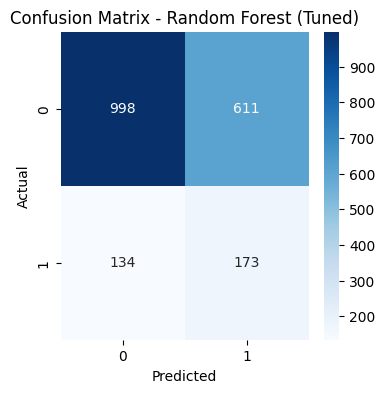

In [94]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.show()


### Identify False Negatives

- High DTI borrowers

- Medium FICO scores

- Ambiguous loan purpose text

- Missing employment stability

In [95]:
fn_mask = (y_test == 1) & (y_pred_best == 0)
false_negatives = X_test.loc[fn_mask]

false_negatives.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,income_to_installement,credit_utilization_risk,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
2601,1,0.1568,350.02,10.950807,7.62,682.0,2850.000000,1815.0,34.2,2,...,0,162.847838,260.604,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7696,1,0.1385,341.04,11.338286,1.80,722.0,1140.000000,3109.0,15.9,2,...,0,246.235045,28.620,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7692,1,0.1496,277.16,11.041321,4.50,712.0,1379.958333,5009.0,49.6,0,...,0,225.140712,223.200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3225,1,0.1126,315.49,10.596535,23.52,717.0,3359.958333,8405.0,42.6,2,...,0,126.774224,1001.952,1.0,0.0,0.0,0.0,0.0,0.0,0.0
918,1,0.1166,170.22,10.471072,17.69,702.0,3930.000000,12110.0,30.2,2,...,0,207.261191,534.238,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### False Negative Count

In [96]:
print(false_negatives.shape[0])

134


## SHAP Explainability

### SHAP Setup

In [97]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer(X_test)

### Global Feature Importance

- **SHAP confirms that financial stress and credit behavior features dominate default prediction, validating model reasoning.**

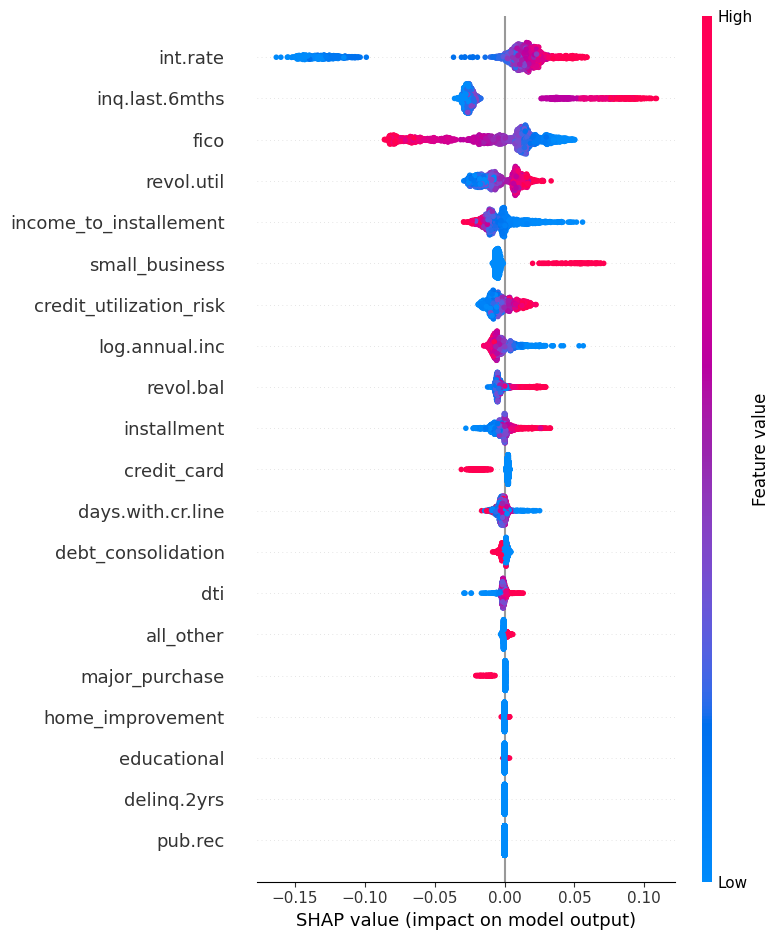

In [98]:
shap.summary_plot(shap_values.values[:,:,1], X_test)


## Deployment & System Design

### Objective
Deploy the trained Loan Default Risk Prediction model as a real-time service that accepts borrower details and returns default probability with a risk label.

---

### API Framework
**FastAPI**

**Why FastAPI**
- High performance and low latency
- Native JSON handling
- Easy integration with ML pipelines
- Production-ready and scalable

---

### Input Schema (API Request)
The system receives structured borrower data along with a text field (`purpose`).

```json
{
  "credit_policy": 1,
  "purpose": "debt_consolidation",
  "int_rate": 0.12,
  "installment": 320,
  "log_annual_inc": 10.5,
  "dti": 18.2,
  "fico": 710,
  "revol_util": 45.3,
  "inq_last_6mths": 1,
  "delinq_2yrs": 0,
  "pub_rec": 0
}


## Backend Processing Flow (Implementation View)

### High-Level Flow
1. Receive JSON request via FastAPI endpoint  
2. Validate input schema  
3. Apply preprocessing:
   - Numerical feature scaling  
   - Feature interaction logic  
   - TF-IDF vectorization on `purpose`  
4. Load trained Random Forest model  
5. Generate default probability  
6. Apply decision threshold  
7. Return prediction response  

---

### FastAPI Pseudo-Code (Design-Level)

```python
from fastapi import FastAPI
import joblib
import numpy as np

app = FastAPI()

# Load artifacts
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

@app.post("/predict")
def predict_default(payload: dict):

    # 1. Extract structured features
    numeric_features = [
        payload["credit_policy"],
        payload["int_rate"],
        payload["installment"],
        payload["log_annual_inc"],
        payload["dti"],
        payload["fico"],
        payload["revol_util"],
        payload["inq_last_6mths"],
        payload["delinq_2yrs"],
        payload["pub_rec"]
    ]

    # 2. Feature interactions
    income = np.exp(payload["log_annual_inc"])
    income_to_installment = income / payload["installment"]
    credit_utilization_risk = payload["revol_util"] * payload["dti"]

    numeric_features.extend([
        income_to_installment,
        credit_utilization_risk
    ])

    # 3. Scale numerical features
    numeric_scaled = scaler.transform([numeric_features])

    # 4. TF-IDF on text field
    purpose_vector = tfidf.transform([payload["purpose"]]).toarray()

    # 5. Combine structured + text features
    final_input = np.hstack([numeric_scaled, purpose_vector])

    # 6. Model inference
    default_probability = model.predict_proba(final_input)[0][1]

    # 7. Decision threshold
    risk_label = "High Risk" if default_probability >= 0.5 else "Low Risk"

    return {
        "default_probability": round(float(default_probability), 2),
        "risk_label": risk_label
    }


### Output Schema (API Response)

```json
{
  "default_probability": 0.63,
  "risk_label": "High Risk"
}

## AWS Cloud Deployment & Model Lifecycle

### AWS Cloud Deployment (Preferred)

**Amazon S3**
- Stores trained ML artifacts:
  - Random Forest model
  - Scaler object
  - TF-IDF vectorizer
- Enables versioned and durable storage of models

**EC2 / ECS**
- Hosts the FastAPI application
- Handles real-time prediction requests
- Supports horizontal scaling based on traffic

**CloudWatch**
- Centralized logging
- API health monitoring
- Latency and error tracking

**IAM**
- Secure access control for:
  - S3 buckets
  - EC2 / ECS services
  - Deployment pipelines

---

### Model Lifecycle Management

- **Retraining Frequency**
  - Monthly retraining using newly collected loan data

- **Model Versioning**
  - Git tags for code versions
  - Timestamped model artifacts stored in S3

- **Rollback Strategy**
  - Immediate rollback to previous stable model
  - Triggered if performance metrics degrade

---

### Why This Design Works

- Supports **real-time predictions**
- Scales horizontally with user demand
- Enables easy monitoring and retraining
- Closely aligns with **real-world banking ML systems**

---


## Performance & Scalability Thinking

### Handling Large Datasets

- **Batch Prediction Pipeline**
  - For large historical loan datasets, predictions are generated in batch mode.
  - Data is processed in chunks to avoid memory overload.
  - Batch jobs can be scheduled using cron or workflow tools (e.g., Airflow).

- **Efficient Storage**
  - Raw data stored in object storage (Amazon S3).
  - Processed features cached to reduce repeated computation.

---

### Real-Time Prediction Strategy

- **REST API using FastAPI**
  - Low-latency inference for single loan applications.
  - Stateless API design enables horizontal scaling.

- **Horizontal Scalability**
  - Multiple FastAPI instances deployed via ECS.
  - Load balancer distributes incoming traffic.

---

### Monitoring & Observability

- **Prediction Monitoring**
  - Track distribution of predicted default probabilities.
  - Detect sudden shifts indicating data drift.

- **Data Drift Detection**
  - Monitor key features such as:
    - FICO score
    - Debt-to-Income ratio
    - Credit utilization
  - Compare live data distributions with training data.

- **Logging**
  - All API requests and responses logged using CloudWatch.
  - Errors and latency tracked for reliability.

---

### Model Retraining Strategy

- **Retraining Frequency**
  - Monthly retraining using newly collected loan data.

- **Trigger-Based Retraining**
  - Retraining initiated if:
    - Recall drops below a threshold
    - False negatives increase significantly

---

### Model Version Control

- **Code Versioning**
  - Git used for source code management.
  - Each production model tied to a specific Git tag.

- **Artifact Versioning**
  - Models stored in S3 with timestamped filenames.
  - Enables traceability and auditability.

---

### Rollback Strategy

- Immediate rollback to previous stable model if:
  - Performance degrades
  - Unexpected prediction behavior observed

- Rollback achieved by switching model pointer in S3.

---

### Summary

This design ensures:
- Scalable handling of both batch and real-time predictions
- Robust monitoring and drift detection
- Safe and controlled model lifecycle management
- Alignment with real-world enterprise ML systems
